<a href="https://colab.research.google.com/github/CristianCosci/LAB_MachineLearning_course/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.utils import np_utils

**The CIFAR-10 dataset**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [23]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_images[0].shape)
#print(train_images[0])
# Normalize pixel values to be between 0 and 1

# Normalization
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images =  test_images / 255.0

print("shape of train labels:", train_labels.shape)
print("some train labels",train_labels[:10])

(50000, 32, 32, 3)
(32, 32, 3)
shape of train labels: (50000, 1)
some train labels [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


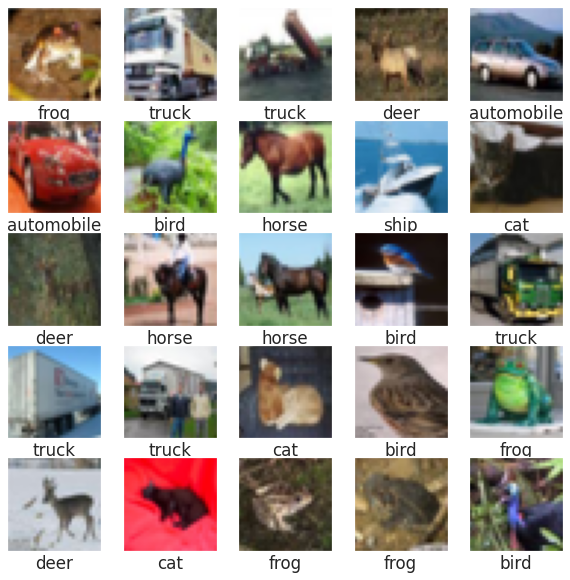

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [25]:
# Create a CNN model  # add dropout and control overfitting # try to improve the accuracy
model = keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Need to pass from 2d data to 1d for the dense layer -> use a flatten layer
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=len(class_names), activation='softmax'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [26]:
# Compile and train
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5587 - accuracy: 0.4312 - val_loss: 1.3348 - val_accuracy: 0.5150
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2208 - accuracy: 0.5654 - val_loss: 1.1421 - val_accuracy: 0.5878
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0615 - accuracy: 0.6276 - val_loss: 1.1119 - val_accuracy: 0.6111
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9586 - accuracy: 0.6621 - val_loss: 0.9758 - val_accuracy: 0.6558
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8829 - accuracy: 0.6912 - val_loss: 0.9116 - val_accuracy: 0.6826
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8202 - accuracy: 0.7111 - val_loss: 0.8800 - val_accuracy: 0.6929
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7694 - accuracy: 0.7313 - val_loss: 0.8752 - val_

In [27]:
# Save model
model.save('model_cnn.h5')

**Model evaluation**

313/313 [==============================] - 2s 5ms/step - loss: 0.8800 - accuracy: 0.7074


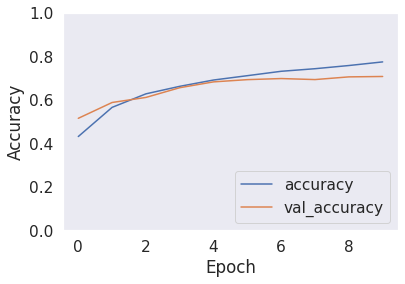

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

**Confusion matrix**

even if we use a different library to build our classifiers, we can still mix-and-match and use utilies functions from other libraries to analyze and evaluate the performance of a model. 

In [29]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_images)
matrix = confusion_matrix(test_labels, y_pred.argmax(axis=1))
print(matrix)

[[705  25  52  32  21  18   4  26  84  33]
 [ 13 864  11   5   3   7   7   2  21  67]
 [ 68   5 557  63 107  92  34  48  19   7]
 [ 10   9  50 523  79 227  31  40  17  14]
 [ 12   4  62  70 649  55  11 118  16   3]
 [ 10   5  40 136  41 689  11  60   6   2]
 [ 12   7  56  83  66  32 714  14   8   8]
 [  8   4  20  33  52  87   4 781   2   9]
 [ 56  29  20  15   7  13   1  11 811  37]
 [ 29  88  11  20   6  19   3  20  23 781]]


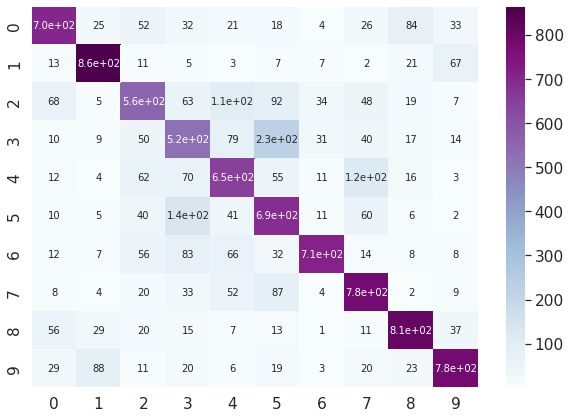

In [30]:
import seaborn as sn
import pandas  as pd 
 
df_cm = pd.DataFrame(matrix, range(10),range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="BuPu",annot=True,annot_kws={"size": 10})# font size
plt.show()

**Analyze the outputs from intermediate convolutional layers**




In [31]:
model.layers

In [32]:
# Print the name and shape of the conv layers
# Summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	if 'conv' not in layer.name:
		continue
	
	print(i, layer.name, layer.output.shape)

0 conv2d_3 (None, 30, 30, 32)
2 conv2d_4 (None, 13, 13, 64)
4 conv2d_5 (None, 4, 4, 64)


In [33]:
# Create a new model using layers from the previous model
# redefine model to output right after the first hidden layer
model_v = keras.Model(inputs = model.inputs, outputs= model.layers[0].output)
model_v.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Get the feature maps for an images
feature_maps = model_v.predict(train_images[4].reshape(1, 32, 32, 3))
# print(feature_maps)
print(feature_maps.shape)

(1, 30, 30, 32)


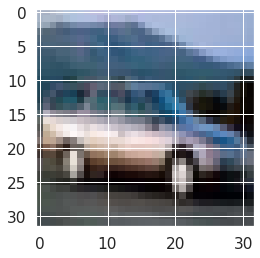

In [35]:
plt.imshow(train_images[4])

[]

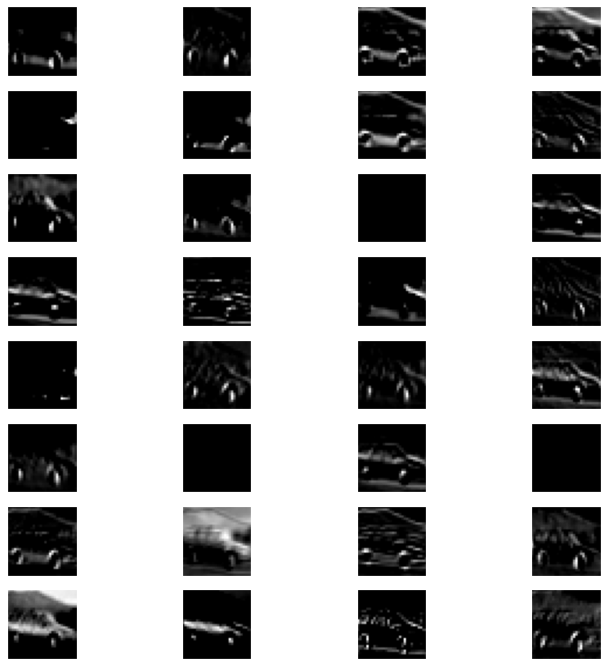

In [36]:
# Plot the feature maps
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
fig  = plt.figure(figsize=(12,12))

for i in range(32):
    sub = fig.add_subplot(8,4, i+1)
    sub.imshow(feature_maps[0,:,:,i], cmap = "gray") 
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

In [37]:
# Repeat the above process using the second conv layer in our initial model
# redefine model to output right after the second conv  layer
model_v_2 = keras.Model(inputs = model.inputs, outputs= model.layers[2].output)
model_v_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Get the feature maps for an images
feature_maps_2 = model_v_2.predict(train_images[4].reshape(1, 32, 32, 3))
#print(feature_maps_2)
print(feature_maps_2.shape)

(1, 13, 13, 64)


[]

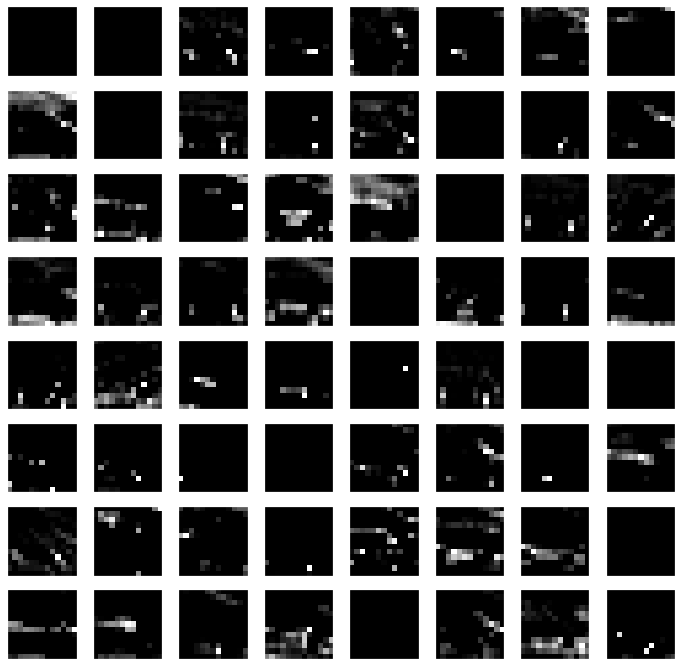

In [39]:
# Plot the featue maps
fig  = plt.figure(figsize=(12,12))

for i in range(64):
    sub = fig.add_subplot(8,8, i+1)
    sub.imshow(feature_maps_2[0,:,:,i], cmap = "gray")
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

(1, 4, 4, 64)


[]

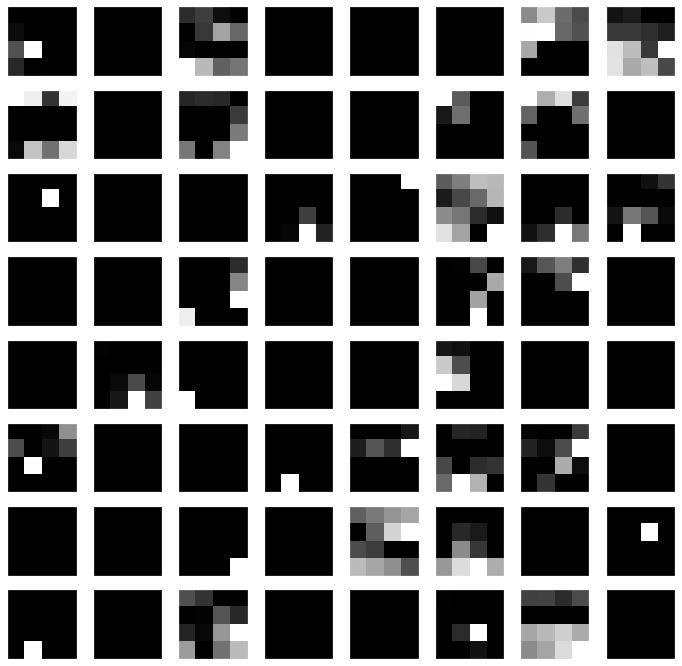

In [40]:
# Repeat the above process using the third conv layer in our initial model
# redefine model to output right after the third conv  layer
model_v_4 = keras.Model(inputs = model.inputs, outputs= model.layers[4].output)
#TO DO: get the feature maps for an images
feature_maps_4 = model_v_4.predict(train_images[4].reshape(1, 32, 32, 3))
#print(feature_maps_2)
print(feature_maps_4.shape)

#TO DO : plot the featue maps
fig  = plt.figure(figsize=(12,12))

for i in range(64):
    sub = fig.add_subplot(8,8, i+1)
    sub.imshow(feature_maps_4[0,:,:,i], cmap = "gray")
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])